# 🎓 **Applied Artificial Intelligence Master**

## 🤖 **Course: Fintech and Digital Innovation in Finance (Gpo 10)**

### 🏛️ Tecnológico de Monterrey

#### 👨‍🏫 **Lead Professor:** Marie-Ève Malette
#### 👩‍🏫 **Assistant Professor:** Yetnalezi Quintas Ruiz

### 📊 **Project 1 Section A | Text embeddings on S&P 500 data**

#### 📅 **July 24th, 2025**

#### **Student:**
* 🧑‍💻 Oscar Enrique García García (A01016093)

# Introduction to text embeddings on S&P 500 news

📌 Objectives

By the end of this notebook, students will be able to:

1. **Retrieve Financial News:**
   - Use the `yfinance` library to gather news headlines for all companies in the S&P 500 index.

2. **Clean and Structure Financial Text Data:**
   - Extract and organize relevant metadata (e.g., ticker, title, summary, publication date, URL) into a structured pandas DataFrame.

3. **Generate Text Embeddings:**
   - Apply a pre-trained sentence transformer model (`all-MiniLM-L6-v2`) to convert news headlines and summaries into numerical embeddings.

4. **Apply Clustering Techniques:**
   - Use K-Means clustering to identify groups of similar news articles based on semantic content.

5. **Determine Optimal Number of Clusters:**
   - Evaluate clustering quality using silhouette scores to find the best number of clusters.

6. **Visualize High-Dimensional Embeddings:**
   - Reduce the embedding space using PCA and visualize clusters in two dimensions.

7. **Interpret Cluster Themes:**
   - Analyze representative news


## Install and Import important librairies

In [1]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install -U sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [2]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.metrics import silhouette_score
import yfinance as yf

/Users/oscar.garcia@digitalfemsa.com/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Get the list of stocks in the S&P 500 

In [3]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

display(df_tickers.head())

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
ticker_list = df_tickers['Symbol'].tolist()

In [5]:
#Obtain distinct tickers from ticker_list
distinct_tickers = set(ticker_list)
print(f"Number of distinct tickers in ticker list: {len(distinct_tickers)}")

Number of distinct tickers in ticker list: 503


## Get the news of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the news of all 500 stocks in the index.
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

### Get the news in a dictionary

In [6]:
# Create a dictionary where the keys are the symbols (tickers) of each 500 stocks 
# and the value is the output news from the yfinance library

news_dict = {}

for ticker in ticker_list:
    try:
        stock = yf.Ticker(ticker)
        news = stock.news  
        news_dict[ticker] = news
    except Exception as e:
        news_dict[ticker] = []
        print(f"Error retrieving news for {ticker}: {e}")

# Display a sample from the dictionary
sample_ticker = ticker_list[0]
print(f"Sample news for {sample_ticker}:")
print(news_dict[sample_ticker][:2]) 

Sample news for MMM:
[{'id': '2f475c52-e043-3340-9129-7f18b3fdb18d', 'content': {'id': '2f475c52-e043-3340-9129-7f18b3fdb18d', 'contentType': 'STORY', 'title': '3M Company (MMM): “I Was Surprised” By The Organic Growth Rate, Says Jim Cramer', 'description': '', 'summary': 'We recently published 12 Stocks Jim Cramer Talked About. 3M Company (NYSE:MMM) is one of the stocks Jim Cramer recently discussed. 3M Company (NYSE:MMM) is one of the largest industrial conglomerates in the world. Its shares have gained 16.7% year-to-date as part of a bullish run in industrial stocks that Cramer has commented on several […]', 'pubDate': '2025-07-24T09:03:00Z', 'displayTime': '2025-07-24T09:03:00Z', 'isHosted': True, 'bypassModal': False, 'previewUrl': None, 'thumbnail': {'originalUrl': 'https://media.zenfs.com/en/insidermonkey.com/093e1a4edd0e304bc17c1f522a735210', 'originalWidth': 1000, 'originalHeight': 667, 'caption': '3M Company (MMM): "I Was Surprised" By The Organic Growth Rate, Says Jim Cramer

In [7]:
#Obtain distinct tickers from news_dict
distinct_tickers_news = set(news_dict.keys())
print(f"Number of distinct tickers in news data: {len(distinct_tickers_news)}")

Number of distinct tickers in news data: 503


### Structure the news into a pandas dataframe 

Your final dataframe should have the following columns: 
- TICKER
- TITLE (of the news)
- SUMMARY (of the news)
- PUBLICATION_DATE (of the news)
- URL (of the news)

Note: all of those fields are provided in the yfinance news component. Refer to the library documentation.

In [8]:
# Convert the news data into a DataFrame
news_data = []
for ticker, news in news_dict.items():
    for article in news:
        content = article.get('content', {})
        if not isinstance(content, dict):
            content = {}
        news_data.append({
            'TICKER': ticker,
            'TITLE': content.get('title', ''),
            'SUMMARY': content.get('summary', ''),
            'PUBLICATION_DATE': content.get('pubDate', ''),
            'URL': content.get('canonicalUrl', {}).get('url', ''),
        })

df_news = pd.DataFrame(news_data)
df_news.head()

,TICKER,TITLE,SUMMARY,PUBLICATION_DATE,URL
0,MMM,3M Company (MMM): “I Was Surprised” By The Org...,We recently published 12 Stocks Jim Cramer Tal...,2025-07-24T09:03:00Z,https://finance.yahoo.com/news/3m-company-mmm-...
1,MMM,"Zacks Industry Outlook Highlights Honeywell, 3...","HON, MMM, CSL, and FSS are well-positioned to ...",2025-07-21T09:45:00Z,https://finance.yahoo.com/news/zacks-industry-...
2,MMM,"Stock Market News for Jul 21, 2025",U.S. stock markets closed mostly lower n Frida...,2025-07-21T08:22:00Z,https://finance.yahoo.com/news/stock-market-ne...
3,MMM,3M Co (MMM) Q2 2025 Earnings Call Highlights: ...,3M Co (MMM) reports a 12% increase in adjusted...,2025-07-19T07:05:47Z,https://finance.yahoo.com/news/3m-co-mmm-q2-20...
4,MMM,MMM Q1 Deep Dive: Tariffs Loom Over Stable Ope...,Industrial conglomerate 3M (NYSE:MMM) reported...,2025-07-19T05:30:58Z,https://finance.yahoo.com/news/mmm-q1-deep-div...


In [9]:
#Obtain distinct tickers from news_data
distinct_tickers = df_news['TICKER'].unique()
print(f"Number of distinct tickers in news data: {len(distinct_tickers)}")

Number of distinct tickers in news data: 502


In [10]:
for ticker in news_dict:
    if not news_dict[ticker]:
        print(f"No news found for ticker: {ticker}")

No news found for ticker: BF.B


## Exploring text embeddings

- Use the open-source model: 'sentence-transformers/all-MiniLM-L6-v2' to create embeddings on the news title and summary
- Add a column to your news dataframe called EMBEDDED_TEXT using ONLY the TITLE of the news
- Add a column to your news dataframe called EMBEDDINGS, which contains the embedding of EMBEDDED_TEXT


In [11]:
text_test = (df_news['TITLE']).tolist()
text_test[0:20]

['3M Company (MMM): “I Was Surprised” By The Organic Growth Rate, Says Jim Cramer',
 'Zacks Industry Outlook Highlights Honeywell, 3M, Carlisle Companies and Federal Signal',
 'Stock Market News for Jul 21, 2025',
 '3M Co (MMM) Q2 2025 Earnings Call Highlights: Strong EPS Growth Amidst Global Challenges',
 'MMM Q1 Deep Dive: Tariffs Loom Over Stable Operations and Product Launch Momentum',
 'Dow Falls as Trump Reportedly Seeks Higher EU Tariffs; Nasdaq Clinches New High',
 '3M Gives Investors a ‘Beat and Raise.’ The Stock Is Rising.',
 'Equities Fall Intraday as Trump Reportedly Pushes for Higher Tariffs on EU',
 'US Equity Indexes Slip in Choppy Trading After S&P 500, Nasdaq Composite Scale Fresh Record Highs',
 '3M (MMM) Stock Trades Down, Here Is Why',
 'Why Are A. O. Smith (AOS) Shares Soaring Today',
 'A.O. Smith lifts annual profit forecast, considers China partnership',
 'A. O. Smith Q2 Earnings Surpass Estimates, Sales Decline Y/Y',
 'A.O. Smith (AOS) Beats Q2 Earnings and Reve

In [12]:
model = SentenceTransformer('all-MiniLM-L6-v2')

#Create a new column with the title of the news articles
df_news['EMBEDDED_TEXT'] = df_news['TITLE']

# Combine TITLE and SUMMARY for embeddings
combined_text = (df_news['TITLE']).tolist()

# Compute embeddings for combined TITLE and SUMMARY
df_news['EMBEDDINGS'] = model.encode(combined_text, show_progress_bar=True).tolist()

# Display the updated dataframe
df_news.head()

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

,TICKER,TITLE,SUMMARY,PUBLICATION_DATE,URL,EMBEDDED_TEXT,EMBEDDINGS
0,MMM,3M Company (MMM): “I Was Surprised” By The Org...,We recently published 12 Stocks Jim Cramer Tal...,2025-07-24T09:03:00Z,https://finance.yahoo.com/news/3m-company-mmm-...,3M Company (MMM): “I Was Surprised” By The Org...,"[0.006455391179770231, -0.10904762148857117, -..."
1,MMM,"Zacks Industry Outlook Highlights Honeywell, 3...","HON, MMM, CSL, and FSS are well-positioned to ...",2025-07-21T09:45:00Z,https://finance.yahoo.com/news/zacks-industry-...,"Zacks Industry Outlook Highlights Honeywell, 3...","[-0.02162923663854599, -0.07978320121765137, -..."
2,MMM,"Stock Market News for Jul 21, 2025",U.S. stock markets closed mostly lower n Frida...,2025-07-21T08:22:00Z,https://finance.yahoo.com/news/stock-market-ne...,"Stock Market News for Jul 21, 2025","[-0.03746959567070007, -0.04381372779607773, 0..."
3,MMM,3M Co (MMM) Q2 2025 Earnings Call Highlights: ...,3M Co (MMM) reports a 12% increase in adjusted...,2025-07-19T07:05:47Z,https://finance.yahoo.com/news/3m-co-mmm-q2-20...,3M Co (MMM) Q2 2025 Earnings Call Highlights: ...,"[-0.08080142736434937, -0.029800791293382645, ..."
4,MMM,MMM Q1 Deep Dive: Tariffs Loom Over Stable Ope...,Industrial conglomerate 3M (NYSE:MMM) reported...,2025-07-19T05:30:58Z,https://finance.yahoo.com/news/mmm-q1-deep-div...,MMM Q1 Deep Dive: Tariffs Loom Over Stable Ope...,"[-0.019502636045217514, -0.07280400395393372, ..."


In [13]:
df_news.shape

(5020, 7)

## Using K-means clustering on news embeddings
to simplify, keep only one news for each company (ticker), you should have 500 rows in your news dataframe

In [14]:
df_news_unique = df_news.groupby('TICKER', as_index=False).apply(lambda x: x.sample(1, random_state=32)).reset_index(drop=True)

# Check the number of unique tickers (should be 500)
print(f"Number of unique tickers: {df_news_unique.shape[0]}") #It also matches with the rows of the dataframe 
df_news_unique.head()

Number of unique tickers: 502


,TICKER,TITLE,SUMMARY,PUBLICATION_DATE,URL,EMBEDDED_TEXT,EMBEDDINGS
0,A,Here's How Much You'd Have If You Invested $10...,"Why investing for the long run, especially if ...",2025-06-19T12:30:04Z,https://finance.yahoo.com/news/heres-much-youd...,Here's How Much You'd Have If You Invested $10...,"[0.0004047602415084839, 0.026826495304703712, ..."
1,AAPL,Axon 2 Powers AppLovin's Explosive Growth in M...,APP's AI engine Axon 2 has driven massive ad g...,2025-07-24T17:13:00Z,https://finance.yahoo.com/news/axon-2-powers-a...,Axon 2 Powers AppLovin's Explosive Growth in M...,"[-0.07557284832000732, -0.003636045614257455, ..."
2,ABBV,Looking for Cheap Stocks? Healthcare Shares Ha...,A Goldman ranking of S&P 500 sectors by price/...,2025-07-21T16:40:00Z,https://www.barrons.com/articles/healthcare-st...,Looking for Cheap Stocks? Healthcare Shares Ha...,"[0.013455635868012905, -0.03590184077620506, 0..."
3,ABNB,Madison Large Cap Fund Added Airbnb (ABNB) on ...,"Madison Investments, an investment advisor, re...",2025-07-21T12:47:20Z,https://finance.yahoo.com/news/madison-large-c...,Madison Large Cap Fund Added Airbnb (ABNB) on ...,"[0.026695145294070244, -0.08164289593696594, -..."
4,ABT,Is Hologic Stock a Risky Investment Ahead of I...,HOLX heads into Q3 earnings with revenue and E...,2025-07-22T12:32:00Z,https://finance.yahoo.com/news/hologic-stock-r...,Is Hologic Stock a Risky Investment Ahead of I...,"[-0.0013313130475580692, 0.08479910343885422, ..."


### Identify the number of clusters using the silhouette score

- Using a for loop, do the clustering with different k values (number of clusters), test 1 to 6 clusters
- Compute the silhouette score for every k value
- Plot the silhouette score for different k values

#### Try different values of k and compute silhouette scores

In [15]:
embeddings = df_news_unique['EMBEDDINGS'].tolist()
# Test different k values
silhouette_scores = []
K = range(2, 7) #It should be noted that the silhouette score is undefined for k=1 (a single cluster). The silhouette score measures how well each point fits within its cluster compared to other clusters, which requires at least two clusters to compute meaningful distances between clusters. 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    silhouette_scores.append(score)
    print(f"Silhouette score for k={k}: {score:.4f}")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Silhouette score for k=2: 0.0326
Silhouette score for k=3: 0.0273
Silhouette score for k=4: 0.0298
Silhouette score for k=5: 0.0239
Silhouette score for k=6: 0.0249


#### Plot silhouette scores

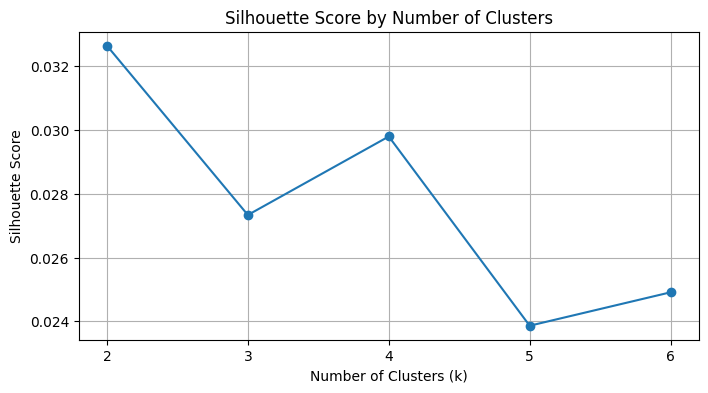

In [16]:
# Plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.xticks(K)
plt.show()

#### Identify the Best k

In [17]:
best_k_index = silhouette_scores.index(max(silhouette_scores))
best_k = list(range(2, 7))[best_k_index]
best_score = silhouette_scores[best_k_index]

print(f"Best k: {best_k} with silhouette score: {best_score:.4f}")

Best k: 2 with silhouette score: 0.0326


#### Cluster the embeddings using 3 clusters (k=3)

In [18]:
#Cluster the embeddings using the best k
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
# Display the first few rows of the clustered DataFrame
df_news_unique.head()

,TICKER,TITLE,SUMMARY,PUBLICATION_DATE,URL,EMBEDDED_TEXT,EMBEDDINGS
0,A,Here's How Much You'd Have If You Invested $10...,"Why investing for the long run, especially if ...",2025-06-19T12:30:04Z,https://finance.yahoo.com/news/heres-much-youd...,Here's How Much You'd Have If You Invested $10...,"[0.0004047602415084839, 0.026826495304703712, ..."
1,AAPL,Axon 2 Powers AppLovin's Explosive Growth in M...,APP's AI engine Axon 2 has driven massive ad g...,2025-07-24T17:13:00Z,https://finance.yahoo.com/news/axon-2-powers-a...,Axon 2 Powers AppLovin's Explosive Growth in M...,"[-0.07557284832000732, -0.003636045614257455, ..."
2,ABBV,Looking for Cheap Stocks? Healthcare Shares Ha...,A Goldman ranking of S&P 500 sectors by price/...,2025-07-21T16:40:00Z,https://www.barrons.com/articles/healthcare-st...,Looking for Cheap Stocks? Healthcare Shares Ha...,"[0.013455635868012905, -0.03590184077620506, 0..."
3,ABNB,Madison Large Cap Fund Added Airbnb (ABNB) on ...,"Madison Investments, an investment advisor, re...",2025-07-21T12:47:20Z,https://finance.yahoo.com/news/madison-large-c...,Madison Large Cap Fund Added Airbnb (ABNB) on ...,"[0.026695145294070244, -0.08164289593696594, -..."
4,ABT,Is Hologic Stock a Risky Investment Ahead of I...,HOLX heads into Q3 earnings with revenue and E...,2025-07-22T12:32:00Z,https://finance.yahoo.com/news/hologic-stock-r...,Is Hologic Stock a Risky Investment Ahead of I...,"[-0.0013313130475580692, 0.08479910343885422, ..."


### Visualize the 2 first PCA Components of your embeddings

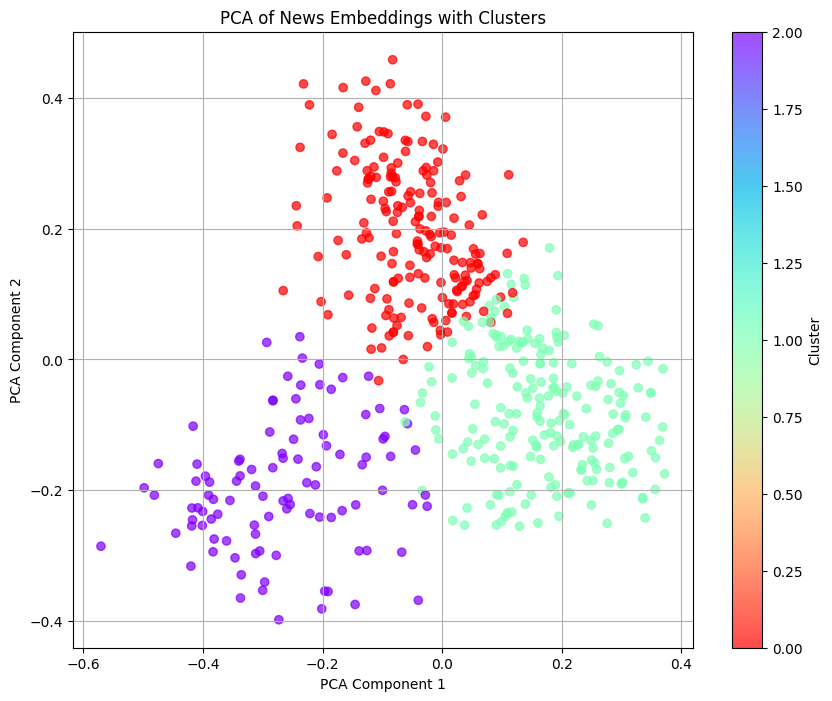

In [19]:
#Visualize the clusters using PCA
pca = PCA(n_components=2)
labels = kmeans.fit_predict(embeddings)
pca_result = pca.fit_transform(df_news_unique['EMBEDDINGS'].tolist())
plt.figure(figsize=(10, 8))
scatter= plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='rainbow_r', alpha=0.7)
plt.title('PCA of News Embeddings with Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()

We can see in the graph, that the 3 clusters are well defined in a 2-dimension plot; however, we can also see that clusters are a little bit imbalanced and cluster 0 is overlapped with cluster 1. This can lead to false assumptions in our results.

#### Analyze the content of each cluster
- Add the kmeans cluster label to your news dataframe
- Print the content of each cluster and analyze it

In [20]:
pd.set_option('display.max_colwidth', None)

In [21]:
df_news_unique['CLUSTER_LABEL'] = labels

# Print the number of news in each cluster
print(df_news_unique['CLUSTER_LABEL'].value_counts())

# Display sample news from each cluster for analysis
for cluster_id in range(3):
    print(f"\n--- Cluster {cluster_id} ---")
    display(df_news_unique[df_news_unique['CLUSTER_LABEL'] == cluster_id][['TICKER', 'TITLE', 'SUMMARY', 'URL']].head(5))

CLUSTER_LABEL
1    210
0    190
2    102
Name: count, dtype: int64

--- Cluster 0 ---


,TICKER,TITLE,SUMMARY,URL
0,A,Here's How Much You'd Have If You Invested $1000 in Agilent Technologies a Decade Ago,"Why investing for the long run, especially if you buy certain popular stocks, could reap huge rewards.",https://finance.yahoo.com/news/heres-much-youd-invested-1000-123004524.html
1,AAPL,Axon 2 Powers AppLovin's Explosive Growth in Mobile Advertising,"APP's AI engine Axon 2 has driven massive ad growth, but a lofty valuation and slowing momentum now test investor confidence.",https://finance.yahoo.com/news/axon-2-powers-applovins-explosive-171300100.html
3,ABNB,Madison Large Cap Fund Added Airbnb (ABNB) on a Dip,"Madison Investments, an investment advisor, released its “Madison Large Cap Fund” second-quarter 2025 investor letter. A copy of the letter can be downloaded here. In the second quarter, the fund (Class Y) increased 3.1%, compared to a 10.9% gain for the S&P 500 index. In addition, please check the fund’s top five holdings to know […]",https://finance.yahoo.com/news/madison-large-cap-fund-added-124720533.html
6,ACN,Rezolve AI (RZLV) Launches Global Professional Services Division for AI Growth,"Rezolve AI PLC (NASDAQ:RZLV) is one of the most popular AI penny stocks to buy according to billionaires. On June 26, the company announced the creation of Rezolve Ai Professional Services, a global growth platform to meet rising demand in the enterprise AI services market. The company appointed Sauvik Banerjjee to lead the division’s efforts. […]",https://finance.yahoo.com/news/rezolve-ai-rzlv-launches-global-104601351.html
10,ADP,Economic Data Deluge This Week,Economic Data Deluge This Week.,https://finance.yahoo.com/news/economic-data-deluge-week-145000729.html



--- Cluster 1 ---


,TICKER,TITLE,SUMMARY,URL
2,ABBV,Looking for Cheap Stocks? Healthcare Shares Haven’t Looked This Good in 30 Years.,A Goldman ranking of S&P 500 sectors by price/earnings ratios reveals opportunities in healthcare stocks.,https://www.barrons.com/articles/healthcare-stocks-cheap-30-year-low-87618ecc?siteid=yhoof2&yptr=yahoo
7,ADBE,Adobe Inc. (ADBE) Is a Trending Stock: Facts to Know Before Betting on It,"Adobe (ADBE) has received quite a bit of attention from Zacks.com users lately. Therefore, it is wise to be aware of the facts that can impact the stock's prospects.",https://finance.yahoo.com/news/adobe-inc-adbe-trending-stock-130004028.html
8,ADI,2 Large-Cap Stocks for Long-Term Investors and 1 We Brush Off,"Large-cap stocks have the power to shape entire industries thanks to their size and widespread influence. With such vast footprints, however, finding new areas for growth is much harder than for smaller, more agile players.",https://finance.yahoo.com/news/2-large-cap-stocks-long-043554632.html
9,ADM,"ADM, Ingredion Stocks Fall After Trump Says Coke Will Ditch Corn Syrup","President Trump said Coca-Cola (KO) will go back to using cane sugar in its namesake soda, following criticism of sweeteners such as high-fructose corn syrup by Trump’s health secretary. Shares of both Archer Daniels Midland (ADM) and Ingredion (INGR), which supply corn syrup, fell Thursday.",https://www.wsj.com/livecoverage/stock-market-today-dow-sp-500-nasdaq-07-17-2025/card/adm-stock-falls-after-trump-says-coke-will-ditch-corn-syrup-86tGrUqZDBDNvZPpvtNV?siteid=yhoof2&yptr=yahoo
11,ADSK,Autodesk Stock Rallies As Firm Nixes Rumored PTC Acquisition,Autodesk stock on Monday rebounded from a sharp sell-off after the design software firm ruled out a potential bid for industry peer PTC.,https://www.investors.com/news/technology/autodesk-stock-rallies-as-firm-nixes-rumored-ptc-acquisition/?src=A00220&yptr=yahoo



--- Cluster 2 ---


,TICKER,TITLE,SUMMARY,URL
4,ABT,Is Hologic Stock a Risky Investment Ahead of Its Q3 Earnings Report?,"HOLX heads into Q3 earnings with revenue and EPS estimates down, tariff pressures mounting, and stock lagging peers.",https://finance.yahoo.com/news/hologic-stock-risky-investment-ahead-123200275.html
5,ACGL,Reflecting On Reinsurance Stocks’ Q1 Earnings: Arch Capital Group (NASDAQ:ACGL),The end of an earnings season can be a great time to discover new stocks and assess how companies are handling the current business environment. Let’s take a look at how Arch Capital Group (NASDAQ:ACGL) and the rest of the reinsurance stocks fared in Q1.,https://finance.yahoo.com/news/reflecting-reinsurance-stocks-q1-earnings-033254212.html
16,AIG,What to Expect From American International Group's Q2 2025 Earnings Report,"American International Group will release its second-quarter earnings next month, and analysts anticipate a double-digit bottom-line growth.",https://www.barchart.com/story/news/33346759/what-to-expect-from-american-international-group-s-q2-2025-earnings-report
18,AJG,Here’s Why Arthur J. Gallagher (AJG) Outperformed in Q1,"Qualivian Investment Partners, an investment partnership focused on long-only public equities, released its Q1 2025 investor letter. A copy of the letter can be downloaded here. The fund outperformed the iShares MSCI USA Quality Factor ETF (QUAL) by 66.0% and 59.4% on a gross and net basis, since inception through March 31, 2025. It also […]",https://finance.yahoo.com/news/why-arthur-j-gallagher-ajg-125238765.html
21,ALGN,Align Technology's Quarterly Earnings Preview: What You Need to Know,"Align Technology is gearing up to release its second-quarter results later this month, and analysts expect a solid double-digit growth in earnings.",https://www.barchart.com/story/news/33190486/align-technology-s-quarterly-earnings-preview-what-you-need-to-know




## Question Section

Take time to reflect on what you've implemented and observed. Answer the following questions in a separate markdown cell or notebook file:

---

### Technical Understanding

#### 1️⃣ How might the choice of embedding model (e.g., MiniLM vs. a larger transformer) affect your clustering results and interpretation?

A larger transformer probably would capture in a better way the context or semantic meaning of the news, resulting in a better representation of the final clusters in our analysis. It is possible that MiniLM models group news that share the same "words" but not necessarily the same semantic meaning, resulting in overlapped or non-well defined clusters; i.e. it can group semantically distant news together due to lower representational capacity.

It would be our decision to prioritize semantic accuracy over price (computational cost) or viceversa.

---

#### 2️⃣ What would be the differences in embeddings if you used only the TITLE, only the SUMMARY, or the combination of both? How could you empirically test this?

There are many times that a TITLE not always reflects what the whole article is about; often, it's just a hook for the audience so it can be ambiguous; on the other hand, using only the summary, even when you have more information, could result in a very scattered analysis or with lack of focus (what it really matters in the article). Finally, using both of them, could give the model more focus on what really matters, but also more contextual information than using only the title.

Empirically, we can test this creating three columns in our dataframe (TITLE, SUMMARY, TITLE + SUMMARY) and apply the same clustering model for the three of them. Then, we can compare how silhouette score increases or decreases in each case and how much sense it makes the cluster definition.

---

#### 3️⃣ In what situations would using a different dimensionality reduction method (e.g., t-SNE, UMAP) be preferable over PCA for visualization of embeddings?

PCA is linear and may miss important patterns in embeddings. It is recommended to use a different dimensionality reduction methos like t-SNE or UMAP when the structure of the embeddings is nonlinear (which is common in semantic representations).

Also, methods like UMAP handles high-dimensional, sparse data better, preserving the semantic context.

Finally, for methods like t-SNE is known that represent in a better way a 2-dimension plot and can be better if we are gonna present the results to a C-level or business stakeholders.

---

### Data Analysis and Interpretation

#### 4️⃣ Based on your cluster analysis, identify at least two potential challenges you faced in interpreting the clusters and propose strategies to address them.

Two of the problems that I could watch in the cluster analysis (specially when looking at the news titles in each cluster) are:

- Semantic overlap between clusters: It is common that news contain different topics (or impact to different areas) in their content. Also, a single article could contain a mix of sentiments that could mislead the cluster definition. 

    - An strategy to handle this could be to add columns that define explicitly the topic and the main sentiment associated to the article. This columns could also be generated by specific models that are specialized on this tasks.

- Imbalanced and dispersed clusters: The biggest cluster is almost the double in size than the smallest cluster; on the other hand, we can see in our 2D visualization, that the biggest cluster is more compact than the other two:

    - One strategy to handle imbalanced clusters could be switching to other algorithms that handle better this cases: e.g. HDBSCAN.

---

#### 5️⃣ Did you observe any outliers in your 2D visualization? How would you identify and handle these outliers in a production pipeline?

Yes, as I said before, I could see that specifically clusters 1 and 2 are more dispersed than cluster 0, resulting in points that are very far from the cluster centroids.

For handling we could:

- Compute the distance of each point to its cluster centroid and define a treshold.
- Exclude the points that are too far from the centroid in the analysis.

---

#### 6️⃣ If you could assign a 'label' or 'theme' to each cluster you obtained, what would they be? How confident are you in these assignments, and what could you do to validate them systematically?

- Cluster 0
    - Label: Stock Picks and Trends
    - Confidence: High. Most articles (even the titles) talk about investment oportunities or recommendations in investing plans.

- Cluster 1
    - Label: Company-specific news and external events
    - Confidence: Low. The cluster contains a mix of themes: retrospective investments, political issues, legal issues. I think that this cluster could be sub-divided in even more clusters.

- Cluster 2
    - Label: Earnings reports and financial outlooks
    - Confidence: Vrey high. All news talk about earnings performance or preview.

We could validate this systematically doing a keyword frequency analysis (how much does the article mention the keyterms) accros clusters, analyze a sample of news and comparing it to a "manual" labelling process, apply a topic modeling to the sample, etc.
    

---

### Critical Thinking

#### 7️⃣ If news sentiment was incorporated into the analysis, how might this influence the clustering structure and interpretation of the clusters in a financial analysis context?

I think that this question is a little bit related to my answer in question 4. I think that including a "sentiment" column would likely separate clusters by tone (e.g., positive vs. negative economic outlook), providing clearer interpretation for financial analysts.

This could allow investors to link clusters not just to topic, but also to market sentiment impact (e.g., fear-driven vs. opportunity-driven news), resulting in more specific clusters.

---

#### 8️⃣ Discuss the limitations of using k-means clustering for news embeddings. What alternative clustering methods could address these limitations, and under what conditions would you prefer them?

- Limitations of k-means:
    - Assumes spherical, equally sized clusters.
    - Requires predefining k.

- Alternatives:
    - DBSCAN
    - HDBSCAN

As k-means need a predefined "k", we could opt to use DBSCAN or HDBSCAN in cases where we don't know the possible number of clusters in our data; also, as k-means assumes spherical, equally sized clusters, it could be a better option to use an alternative if we expect arbritary-shaped clusters.

---

#### 9️⃣ How could the approach in this notebook be extended to analyze the potential impact of news clusters on stock price movements over time? Sketch a high-level pipeline you would implement to test this.

I think that having the news categorized in the different clusters, then we could do an extensive analysis of how news of different themes, sentiments, political or legal issues affect positevely or negatively to stock prices.

My high-level pipepline would look like this:

1. Retrieve the news from yfinance.
2. Clusterize them (as we do it in this notebook).
3. Retrieve stock prices in a time window (before and after the news).
4. Compute metrics like price, earnings/losses, volatility, average return, etc. for each cluster.
5. Label the news (or the clusters) based on the impact that they have in the mentioned metrics.
6. Combine the results with sentiment analysis or named entity recognition to enrich the analysis: e.g. positive news of earnings in a specific company move the stock prices more than political issues.

---

#### 1️⃣0️⃣ Imagine your clustering shows clear groups of news, but your downstream task (e.g., prediction of stock movement) does not improve. What might explain this disconnect between clear clusters and predictive utility?

As question 9 also says, our embeddings analysis is centered in semantic grouping, i.e. that news are grouped together based on its theme, semantic context and maybe sentiment, but it doesn't mean that they have a strong impact in stock prices. For a better prediction, we should do a match between the news and many other market features that could explain precisely how news affect the price and why.
